### Analyzing the New York Times comments section

For this assignment, inspect the <a href="https://developer.nytimes.com/">NYT API</a>, specifically their API for article comments. We'll be completing two major tasks:
- find out where people are commenting from 
- get the most common words from a specific comment 

In [1]:
# import requests and json
import requests
import json

# put your custom settings for the API call here
# you MUST provide an API key, offset value, and article URL
# get your api key from here: https://developer.nytimes.com/
api_key = "NayYlsi3aQAc15jFlN5CpLOp66K3TBsM"
offset = str(0)
article_url = "https://www.nytimes.com/2020/06/12/opinion/sunday/floyd-protests-white-supremacy.html"
sort = "reader"

# show the API url with all the settings listed out
api_url = "https://api.nytimes.com/svc/community/v3/user-content/url.json?api-key=%s&offset=%s&sort=%s&url=%s" %(api_key, offset, sort, article_url)
print(api_url)

https://api.nytimes.com/svc/community/v3/user-content/url.json?api-key=NayYlsi3aQAc15jFlN5CpLOp66K3TBsM&offset=0&sort=reader&url=https://www.nytimes.com/2020/06/12/opinion/sunday/floyd-protests-white-supremacy.html


In [2]:
# calling the API with requests
response = requests.get(api_url)
# creating a variable called data to hold the json formatted result
data = response.json()

In [3]:
# look at all of the data
# it's a lot of nested dictionaries!
print(type(data))
data

<class 'dict'>


{'debug': {'version': 4, 'nyt-com-shim': True},
 'status': 'OK',
 'copyright': 'Copyright (c) 2020 The New York Times Company.  All Rights Reserved.',
 'results': {'callerID': None,
  'api_timestamp': '1606360449',
  'comments': [{'commentID': 107564420,
    'status': 'approved',
    'commentSequence': 107564420,
    'userID': 72595694,
    'userDisplayName': 'JM',
    'userLocation': 'New York',
    'userTitle': 'NULL',
    'userURL': 'NULL',
    'picURL': None,
    'commentTitle': '<br\\//>',
    'commentBody': '"What’s more, as election season begins in earnest, Americans are going to the ballot box as well." Sustaining this momentum will be absolutely essential: Trump and every elected official who supports him, from local dog-catcher to US Senator, must be vanquished at the polls.',
    'createDate': '1591956558',
    'updateDate': '1593964903',
    'approveDate': '1591956558',
    'recommendations': 674,
    'replyCount': 13,
    'replies': [{'commentID': 107566999,
      'status

In [16]:
# isolate just the comments dictionary
comments = data["results"]["comments"]
comments

[{'commentID': 107564420,
  'status': 'approved',
  'commentSequence': 107564420,
  'userID': 72595694,
  'userDisplayName': 'JM',
  'userLocation': 'New York',
  'userTitle': 'NULL',
  'userURL': 'NULL',
  'picURL': None,
  'commentTitle': '<br\\//>',
  'commentBody': '"What’s more, as election season begins in earnest, Americans are going to the ballot box as well." Sustaining this momentum will be absolutely essential: Trump and every elected official who supports him, from local dog-catcher to US Senator, must be vanquished at the polls.',
  'createDate': '1591956558',
  'updateDate': '1593964903',
  'approveDate': '1591956558',
  'recommendations': 674,
  'replyCount': 13,
  'replies': [{'commentID': 107566999,
    'status': 'approved',
    'commentSequence': 107566999,
    'userID': 34609658,
    'userDisplayName': 'Kristina',
    'userLocation': 'DC',
    'userTitle': 'NULL',
    'userURL': 'NULL',
    'picURL': None,
    'commentTitle': '<br\\//>',
    'commentBody': "@JM \n\nD

In [25]:
# look at just one of the comments
for comment in comments:
    commentBody = comment["commentBody"]
    print(commentBody) 

"What’s more, as election season begins in earnest, Americans are going to the ballot box as well." Sustaining this momentum will be absolutely essential: Trump and every elected official who supports him, from local dog-catcher to US Senator, must be vanquished at the polls.
Help me understand. In what countries does the victors in war put up monuments to those that warred against them, took their sons and daughters lives, destroyed homes and lands, and cost untold treasure?  The Civil War was a tragedy for this country. It showed the long standing evil of an economy based on human slavery. It was a fight to end or keep the “United “ States. 
I do not believe we should be honoring the side of the war that brought us to it, and has perpetuated white supremacy ideology, mass incarceration, organized housing and employment discrimination and much evil. Historically the US has called on its fellow citizens of color to defend it in two world wars, the Vietnam war and more only to bring the

In [48]:
# lowercase the comment and remove punctuation
# you can use the code we wrote for the lexical richness exercise to do this

for comment in comments:
    commentBody = comment["commentBody"]  
    lowercaseComment = commentBody.lower()
    removePunc = lowercaseComment.replace('"', '').replace('.', '').replace('“', '').replace(',', '').replace('’', '').replace('-', '').replace('?', '').replace('(', '').replace(')', '')
    print(removePunc) 
    

whats more as election season begins in earnest americans are going to the ballot box as well sustaining this momentum will be absolutely essential: trump and every elected official who supports him from local dogcatcher to us senator must be vanquished at the polls
help me understand in what countries does the victors in war put up monuments to those that warred against them took their sons and daughters lives destroyed homes and lands and cost untold treasure  the civil war was a tragedy for this country it showed the long standing evil of an economy based on human slavery it was a fight to end or keep the united  states 
i do not believe we should be honoring the side of the war that brought us to it and has perpetuated white supremacy ideology mass incarceration organized housing and employment discrimination and much evil historically the us has called on its fellow citizens of color to defend it in two world wars the vietnam war and more only to bring them to bases named after ci

{'whats': 1, 'more': 1, 'as': 2, 'election': 1, 'season': 1, 'begins': 1, 'in': 1, 'earnest': 1, 'americans': 1, 'are': 1, 'going': 1, 'to': 2, 'the': 2, 'ballot': 1, 'box': 1, 'well': 1, 'sustaining': 1, 'this': 1, 'momentum': 1, 'will': 1, 'be': 2, 'absolutely': 1, 'essential:': 1, 'trump': 1, 'and': 1, 'every': 1, 'elected': 1, 'official': 1, 'who': 1, 'supports': 1, 'him': 1, 'from': 1, 'local': 1, 'dogcatcher': 1, 'us': 1, 'senator': 1, 'must': 1, 'vanquished': 1, 'at': 1, 'polls': 1}


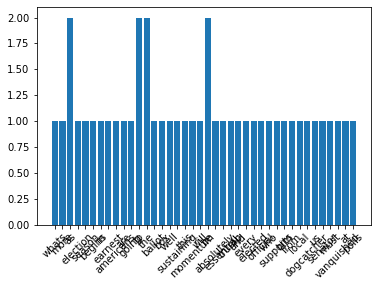

{'help': 1, 'me': 1, 'understand': 1, 'in': 3, 'what': 1, 'countries': 1, 'does': 1, 'the': 9, 'victors': 1, 'war': 5, 'put': 1, 'up': 1, 'monuments': 2, 'to': 7, 'those': 2, 'that': 2, 'warred': 2, 'against': 2, 'them': 3, 'took': 1, 'their': 1, 'sons': 1, 'and': 8, 'daughters': 1, 'lives': 1, 'destroyed': 1, 'homes': 1, 'lands': 1, 'cost': 1, 'untold': 1, 'treasure': 1, '': 2, 'civil': 2, 'was': 2, 'a': 2, 'tragedy': 1, 'for': 2, 'this': 1, 'country': 1, 'it': 5, 'showed': 1, 'long': 1, 'standing': 1, 'evil': 2, 'of': 3, 'an': 1, 'economy': 1, 'based': 1, 'on': 2, 'human': 1, 'slavery': 1, 'fight': 1, 'end': 1, 'or': 1, 'keep': 1, 'united': 2, 'states': 2, '\ni': 1, 'do': 1, 'not': 2, 'believe': 1, 'we': 2, 'should': 2, 'be': 1, 'honoring': 1, 'side': 1, 'brought': 1, 'us': 2, 'has': 2, 'perpetuated': 1, 'white': 1, 'supremacy': 1, 'ideology': 2, 'mass': 1, 'incarceration': 1, 'organized': 1, 'housing': 1, 'employment': 1, 'discrimination': 1, 'much': 1, 'historically': 1, 'called': 

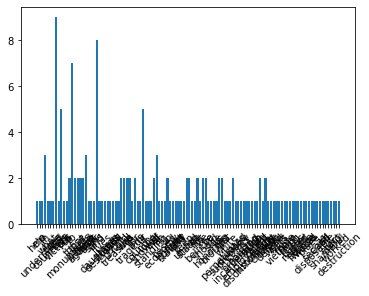

{'in': 5, 'the': 9, 'outskirts': 1, 'of': 7, 'city': 1, 'budapest': 1, 'hungary': 2, 'theres': 1, 'a': 3, 'large': 1, 'park': 3, 'dedicated': 1, 'to': 3, 'obsolete': 2, 'statuary': 1, 'from': 2, 'soviet': 1, 'era': 2, 'its': 2, 'called': 1, 'statue': 1, 'all': 3, 'old': 1, 'public': 1, 'sculpture': 1, 'is': 2, 'there': 1, 'close': 1, 'proximity': 1, 'one': 1, 'another': 1, 'with': 1, 'walkways': 1, 'among': 1, 'them': 3, 'and': 5, 'signage': 1, 'explaining': 1, 'where': 1, 'they': 2, 'stood': 1, 'whom': 1, 'theyre': 1, 'commemorating': 1, 'putting': 1, 'historical': 1, 'context': 1, 'basically': 1, 'cemetery': 1, 'museum': 1, 'for': 1, 'ideas': 2, 'represented': 1, 'some': 1, 'were': 1, 'are': 2, 'real': 1, 'pieces': 1, 'art': 1, 'others': 1, 'rather': 1, 'mediocre': 1, 'but': 1, 'representing': 1, 'bygone': 1, 'bad': 1, 'systems': 1, 'it': 1, 'sad': 1, 'note': 1, 'that': 2, 'has': 1, 'moved': 1, 'away': 1, 'highly': 1, 'cherished': 1, 'idea': 1, 'democracy': 1, 'created': 1, 'this': 1

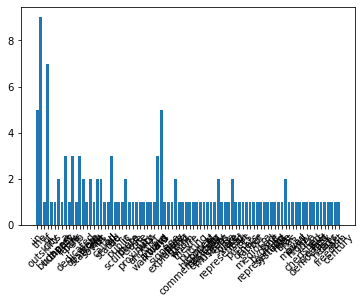

{'even': 1, 'in': 2, 'the': 2, 'north': 1, 'we': 1, 'were': 1, 'taught': 1, 'as': 1, 'children': 1, 'that': 1, 'robert': 1, 'e': 1, 'lee': 1, 'was': 1, 'a': 2, 'great': 1, 'general': 1, 'and': 2, 'noble': 1, 'gentleman': 1, 'who': 1, 'deserved': 1, 'our': 1, 'respect': 1, 'i': 2, 'am': 2, 'grateful': 1, 'to': 3, 'have': 1, 'lived': 1, 'long': 1, 'enough': 1, 'see': 1, 'him': 1, 'his': 1, 'kind': 1, 'literally': 1, 'fall': 1, 'from': 1, 'their': 1, 'pedestals': 1, 'four': 2, 'hundred': 2, 'years': 1, 'of': 2, 'sin': 1, 'may': 1, 'take': 1, 'another': 1, 'be': 1, 'washed': 1, 'away': 1, 'but': 1, 'already': 1, 'smelling': 1, 'whiff': 1, 'cleanliness': 1, 'air': 1}


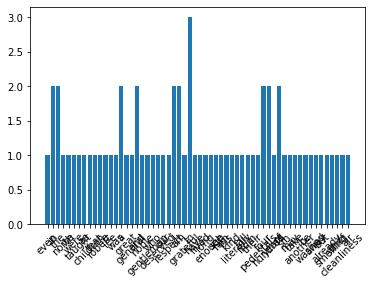

{'regarding': 1, 'columbus\nerasing': 1, 'the': 3, 'memory': 1, 'of': 2, 'a': 1, 'man': 1, 'from': 1, '1492': 1, 'because': 1, 'he': 1, 'does': 1, 'not': 2, 'live': 1, 'up': 1, 'to': 1, 'standards': 1, '2020': 1, 'is': 1, 'way': 1, 'forward': 1}


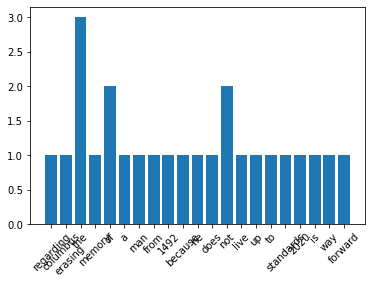

{'fully': 1, 'agree': 1, 'with': 1, 'taking': 1, 'down': 1, 'confederate': 1, 'statues': 1, 'but': 2, 'ive': 1, 'always': 1, 'been': 1, 'a': 3, 'bit': 1, 'divided': 1, 'about': 1, 'christopher': 1, 'columbus': 1, 'the': 5, 'reason': 1, 'hes': 1, 'remembered': 1, 'isnt': 1, 'because': 2, 'of': 3, 'his': 3, 'enslavement': 1, 'caribbean': 1, 'natives': 1, 'he': 1, 'did': 1, 'something': 1, 'that': 3, 'at': 2, 'time': 2, 'was': 2, 'rightfully': 1, 'perceived': 1, 'as': 1, 'incredibly': 1, 'daring': 1, 'namely': 1, 'sail': 1, 'three': 1, 'tiny': 1, 'ships': 1, 'across': 1, 'vast': 1, 'ocean': 1, 'everyone': 1, 'around': 1, 'him': 1, 'felt': 1, 'untraversable': 1, 'and': 2, 'hence': 1, 'represented': 1, 'voyage': 2, 'into': 1, 'certain': 1, 'death￼': 1, '': 3, 'its': 1, 'audacity': 1, 'seamanship': 1, 'we': 1, 'commemorate': 1, 'in': 1, 'other': 1, 'words￼': 1, '15th': 1, 'century': 1, 'equivalent': 1, 'mans': 1, 'first': 1, 'to': 1, 'moon': 1}


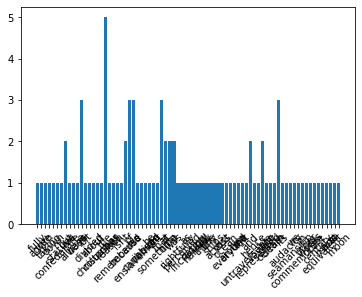

{'to': 4, 'oust': 1, 'the': 3, 'white': 1, 'supremacists': 1, 'from': 2, 'office': 1, 'we': 3, 'are': 1, 'going': 1, 'have': 3, 'overwhelm': 1, 'polls': 2, 'and': 2, 'how': 3, 'many': 3, 'polling': 1, 'places': 1, 'will': 3, 'be': 2, 'shut': 1, 'or': 1, 'broken': 1, 'voting': 1, 'machines': 1, 'insufficient': 1, 'ballots': 2, 'long': 1, 'lines': 1, 'black': 1, 'names': 1, 'been': 1, 'disappeared': 1, 'rolls': 1, 'election': 1, 'results': 1, 'mysteriously': 1, 'at': 2, 'odds': 1, 'with': 1, 'exit': 1, 'urgently': 1, 'need': 2, 'fix': 1, 'this': 1, 'look': 1, 'georgia': 1, 'clean': 1, 'elections': 1, 'paper': 1, 'marked': 1, 'by': 1, 'hand': 1, 'sameday': 1, 'registration': 1}


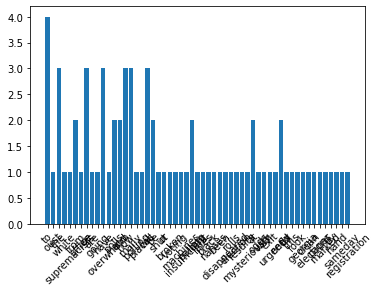

{'is': 1, 'this': 1, 'just': 1, 'a': 1, 'white': 3, 'supremacy': 1, 'problem': 1, 'remember': 1, 'those': 1, 'who': 2, 'would': 1, 'never': 1, 'vote': 1, 'for': 1, 'trump': 2, 'but': 1, 'did': 1, 'anyway': 1, 'racism': 2, 'lives': 1, 'in': 2, 'the': 3, 'shadows': 1, 'of': 3, 'america': 2, 'behind': 1, 'closed': 1, 'doors': 1, 'whispers': 1, 'ears': 1, 'voters': 1, 'claim': 1, 'otherwise': 1, 'it': 1, 'will': 1, 'take': 1, 'much': 1, 'to': 1, 'win': 1, 'hearts': 1, 'and': 1, 'minds': 1, 'that': 1}


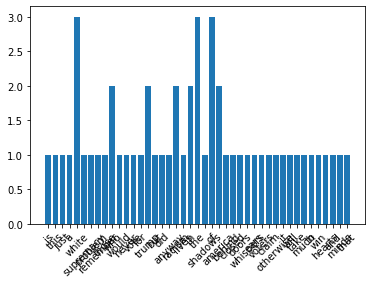

{'mr': 1, 'bouie': 1, 'is': 3, 'wrong': 1, 'about': 2, 'at': 2, 'least': 1, 'one': 1, 'thing': 1, '': 8, "it's": 1, 'actually': 1, 'not': 2, 'unclear': 1, 'all': 1, 'how': 1, 'americans': 1, 'feel': 1, 'this': 4, 'the': 9, 'protesters': 3, "aren't": 1, 'doing': 1, 'themselves': 2, 'any': 1, 'favors': 1, 'in': 5, 'eyes': 1, 'of': 5, 'general': 1, 'public': 1, 'by': 2, 'taking': 1, 'it': 3, 'upon': 1, 'to': 4, 'deface': 1, 'and': 6, 'destroy': 1, 'monuments': 2, 'some': 2, 'which': 1, 'people': 1, 'hold': 1, 'dear': 1, 'my': 1, 'opinion': 1, 'a': 3, 'classic': 1, 'example': 1, 'silent': 2, 'majority': 2, 'gritting': 1, 'its': 1, 'teeth': 1, 'moment': 2, 'lest': 1, 'they': 4, 'be': 5, 'caught': 1, 'called': 1, 'out': 1, 'social': 1, 'justice': 1, 'style': 1, 'defending': 1, 'what': 1, 'have': 1, 'universally': 1, 'deemed': 1, 'indefensible': 1, 'so': 1, 'will': 2, 'wait': 2, 'then': 1, 'using': 1, 'their': 1, 'votes': 1, 'make': 1, 'clear': 1, 'that': 4, 'type': 1, 'activism': 1, 'politic

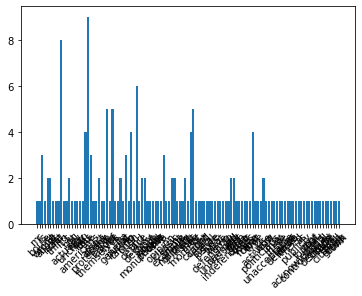

{'to': 1, 'paraphrase': 1, 'someone': 1, 'on': 2, 'twitter': 1, 'taking': 1, 'down': 1, 'statues': 1, 'is': 1, 'the': 1, 'equivalent': 1, 'of': 1, 'replacing': 1, 'that': 2, 'farrah': 1, 'fawcett': 1, 'or': 1, 'rick': 1, 'springfield': 1, 'poster': 1, 'in': 1, 'your': 1, 'bedroom': 1, '': 1, "we've": 1, 'moved': 1, 'as': 1, 'a': 1, 'country': 1, 'our': 1, 'surroundings': 1, 'should': 1, 'reflect': 1}


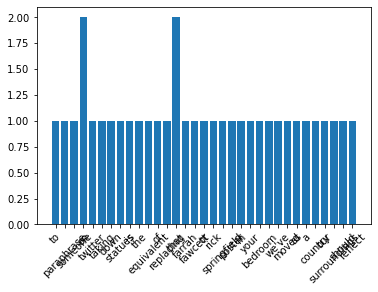

{'tearing': 1, 'down': 1, 'monuments': 1, 'is': 2, 'like': 1, 'burning': 1, 'books': 1, 'it': 2, 'a': 2, 'sign': 1, 'of': 2, 'ignorance': 1, "doesn't": 1, 'change': 1, 'the': 4, 'past': 1, 'and': 1, 'will': 1, 'only': 1, 'hide': 1, 'acts': 1, 'people': 1, 'memorialized': 1, 'better': 1, 'to': 2, 'place': 1, 'plaque': 1, 'on': 1, 'or': 1, 'near': 1, 'monument': 1, 'you': 1, 'wish': 1, 'destroy': 1, 'stating': 1, 'your': 1, 'objection': 1}


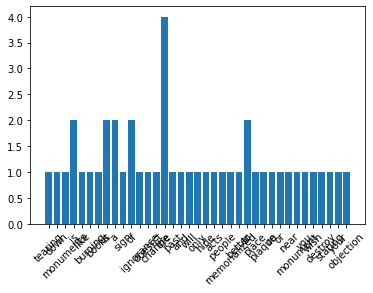

{'after': 1, 'the': 17, 'civil': 4, 'war': 3, 'attitudes': 2, 'towards': 4, 'former': 1, 'slaves': 2, "didn't": 5, 'change': 1, '': 16, 'it': 3, 'matter': 1, 'how': 1, 'hard': 2, 'those': 1, 'people': 1, 'worked': 2, 'being': 2, 'responsible': 1, 'citizens': 2, 'country': 1, 'give': 1, 'them': 2, 'a': 3, 'chance': 1, 'everything': 1, 'was': 4, 'geared': 1, 'assisting': 1, 'white': 1, 'slave': 1, 'owners': 1, 'even': 3, 'whites': 3, 'who': 1, 'own': 1, "weren't": 1, 'helped': 1, 'very': 1, 'much': 1, 'by': 3, 'reconstruction': 1, 'african': 3, 'americans': 3, 'came': 1, 'over': 1, 'on': 1, 'mayflower': 1, 'they': 1, 'originated': 1, 'in': 5, 'europe': 1, 'and': 7, 'with': 1, 'christianity': 2, 'or': 2, 'as': 1, 'practiced': 1, 'europeans': 1, 'of': 7, 'time': 1, '\n\nthere': 1, 'is': 1, 'nothing': 1, 'either': 1, 'old': 1, 'new': 1, 'testament': 1, 'that': 4, 'says': 1, 'skin': 2, 'color': 2, 'determines': 1, 'human': 2, 'worth': 2, 'yet': 1, 'somehow': 1, 'became': 1, 'measurement': 1,

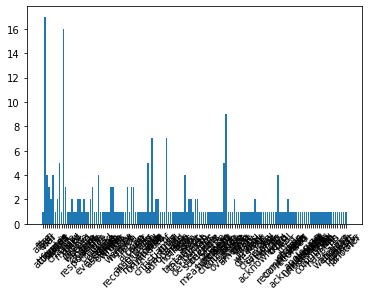

{'i': 3, 'just': 1, 'looked': 1, 'up': 1, 'white': 5, 'supremacy': 4, '': 3, 'it': 1, 'is': 5, 'apparently': 1, 'the': 3, 'belief': 1, 'that': 3, 'whites': 3, 'are': 2, 'superior': 1, 'to': 3, 'other': 2, 'people': 4, 'and': 2, 'therefore': 1, 'have': 2, 'right': 1, 'dominate': 1, 'them\n\nsome': 1, 'still': 1, 'believe': 1, 'this': 2, 'nonsense': 1, 'but': 1, 'most': 1, 'do': 1, 'not': 7, 'personally': 1, 'heard': 1, 'kind': 1, 'of': 4, 'stuff': 1, 'from': 1, 'know': 1, 'for': 1, 'decades': 1, '\n\nbelieving': 1, 'should': 1, 'be': 1, 'judged': 1, 'as': 1, 'individuals': 1, 'requiring': 2, 'all': 1, 'meet': 1, 'basic': 1, 'requirements': 1, 'civilized': 1, 'behavior': 2, 'achievement': 1, 'avoid': 1, 'criminal': 1, 'resisting': 1, 'those': 1, 'who': 1, 'desire': 1, 'unjust': 1, 'compensation': 1, 'based': 1, 'on': 1, 'their': 1, 'membership': 1, 'in': 2, 'a': 1, 'specific': 1, 'group': 1, 'supremacy\n\nthose': 1, 'things': 1, 'instead': 1, 'characteristics': 1, 'advanced': 1, 'societi

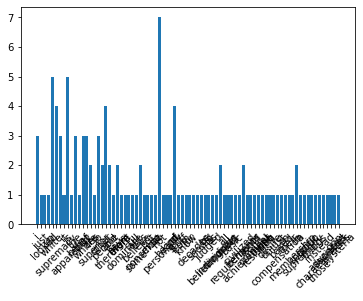

{'beside': 1, 'toppling': 1, 'all': 1, 'statues': 1, 'of': 2, 'slavery': 1, 'supporters': 1, 'i': 1, 'wish': 1, 'places': 1, 'where': 1, 'slaves': 1, 'were': 1, 'sold': 1, 'become': 1, 'memorials': 1, 'with': 1, 'an': 1, 'informative': 1, 'plate': 1, 'every': 1, 'single': 1, 'them': 1}


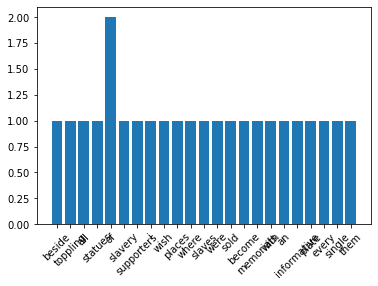

{'attacking': 2, 'monuments': 1, 'is': 1, 'history': 1, 'and': 1, 'education': 1, 'move': 1, 'on': 1}


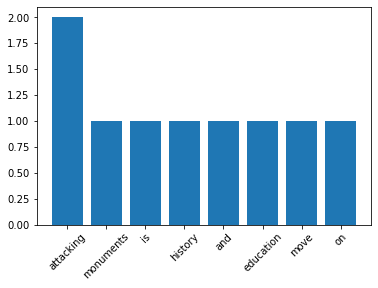

{'this': 1, 'descendant': 1, 'of': 2, 'the': 11, 'mayflower': 1, 'is': 6, 'in': 2, 'total': 1, 'agreement': 1, 'it': 6, 'long': 2, 'past': 2, 'time': 2, 'america': 2, 'stops': 1, 'trying': 1, 'to': 6, 'placate': 2, 'south': 3, 'for': 1, 'its': 1, 'biases': 1, 'we': 3, 'did': 3, 'constitution': 1, 'because': 1, 'they': 3, 'would': 1, 'not': 3, 'budge': 1, 'on': 2, 'slavery': 1, 'and': 3, 'were': 1, 'going': 1, 'sign': 1, 'if': 1, 'get': 1, 'their': 1, 'way': 1, 'after': 1, 'civil': 2, 'war': 2, 'by': 1, 'letting': 1, 'them': 1, 'continue': 1, 'celebrate': 1, 'a': 2, 'bunch': 1, 'traitors': 1, 'terrorists': 1, 'has': 2, 'stop': 1, 'main': 1, 'driving': 1, 'force': 1, 'against': 1, 'more': 1, 'integrated': 1, 'equal': 1, 'yes': 1, 'whole': 1, 'country': 2, 'issues': 1, 'but': 1, 'linchpin': 1, 'have': 1, 'never': 1, 'stopped': 1, 'fighting': 1, 'all': 1, 'that': 1, 'put': 1, 'rest': 1, 'so': 1, 'can': 1, 'move': 1, 'ditto': 1, 'with': 1, 'columbus': 1, 'here': 1, 'are': 1, 'doing': 1, 'it

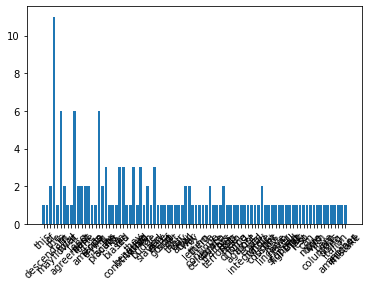

{'we': 5, 'cannot': 2, 'be': 5, 'a': 5, 'free': 1, 'and': 10, 'equal': 1, 'democracy': 1, 'country': 1, 'of': 10, 'inequality': 1, 'unaccountable': 1, 'police': 1, 'violence': 1, 'trumpist': 1, 'exclusion': 1, 'will': 3, 'have': 2, 'to': 9, 'either': 1, 'one': 1, 'or': 1, 'the': 13, 'other': 1, 'protests': 1, 'represent': 1, 'millions': 1, 'americans': 1, 'announcing': 1, 'their': 1, 'allegiance': 1, 'former': 1, 'it': 5, 'remains': 1, 'seen': 1, 'whether': 1, 'that': 4, 'brings': 1, 'reaction': 1, 'similar': 1, 'scope': 1, 'in': 8, 'defense': 1, 'latter\n\nblack': 1, 'lives': 2, 'matter': 2, '': 11, 'absolutely': 1, 'i': 2, 'wholeheartedly': 1, 'endorse': 1, 'this': 2, 'cause': 1, 'fervently': 1, 'support': 1, 'but': 1, 'need': 1, 'acknowledge': 1, 'comes': 1, 'with': 2, 'price': 2, 'is': 4, 'all': 1, 'black': 5, 'voters': 6, 'must': 2, 'turn': 3, 'out': 3, 'on': 1, 'election': 1, 'day': 1, 'they': 2, 'vote': 1, 'down': 1, 'trump': 3, 'his': 2, 'political': 1, 'enablers': 1, 'simply':

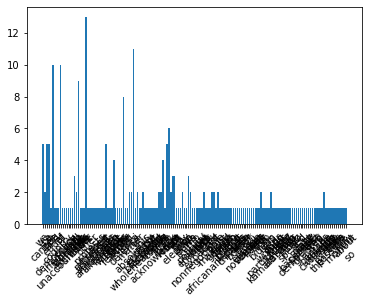

{'having': 1, 'grown': 1, 'up': 1, 'in': 1, 'the': 2, 'south': 1, 'with': 1, 'relatives': 1, 'who': 2, 'fought': 1, 'for': 1, 'confederacy': 1, "i'm": 1, 'proud': 1, 'of': 1, 'that': 1, 'heritage': 1, 'and': 2, 'wish': 1, 'those': 1, 'want': 1, 'to': 2, 'promote': 1, 'african': 1, 'american': 1, 'rights': 1, 'would': 1, 'erect': 1, 'statues': 1, 'their': 1, 'heroes': 1, 'leave': 1, 'ours': 1, 'alone': 1}


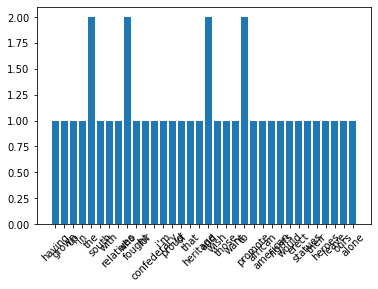

{'take': 1, 'the': 2, 'statues': 1, 'down': 1, 'and': 3, 'put': 1, 'them': 2, 'in': 1, 'vicksburg': 1, 'ms': 1, 'national': 1, 'military': 1, 'park': 2, 'there': 2, 'are': 1, 'miles': 2, 'of': 1, 'space': 1, 'for': 2, "it's": 1, 'most': 1, 'appropriate': 1, 'this': 1, 'is': 2, 'what': 1, 'that': 1}


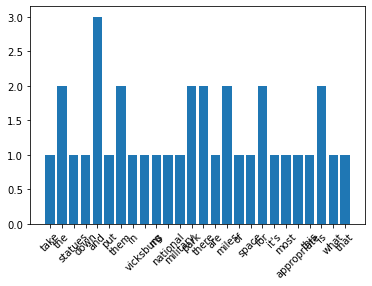

{'can': 1, 'we': 1, 'get': 1, 'over': 2, 'christopher': 1, 'columbus': 2, '': 12, 'a': 4, "ship's": 1, 'captain': 3, 'he': 3, 'ruled': 1, 'crew': 1, 'that': 2, 'would': 4, 'have': 4, 'been': 2, 'whipped': 1, 'and': 6, 'even': 1, 'worse': 1, 'in': 3, 'order': 1, 'to': 4, 'maintain': 1, 'discipline': 1, 'virtually': 2, 'every': 2, 'tyrant': 1, 'on': 1, 'his': 1, 'boat': 1, 'encounters': 1, 'with': 2, 'the': 11, 'natives': 2, 'by': 1, 'explorer': 1, 'were': 1, 'fraught': 1, 'yes': 1, 'used': 1, 'violence': 3, 'control': 1, 'again': 1, 'most': 1, 'voyages': 1, 'new': 2, 'world': 2, 'featured': 1, 'similar': 1, '\n\ncolumbus': 1, 'was': 1, 'brave': 1, 'sailor': 2, 'whose': 1, 'legacy': 1, 'is': 1, 'mixing': 1, 'of': 2, 'old': 1, 'did': 2, 'not': 1, 'create': 1, 'violent': 1, 'late': 1, 'medieval': 1, 'worlds': 1, 'came': 1, 'from': 3, 'spain': 1, 'had': 1, 'just': 1, 'freed': 1, 'itself': 1, 'islam': 1, '\n\nwe': 1, 'need': 1, 'separate': 1, 'our': 1, 'current': 1, 'views': 1, 'norms': 1, '

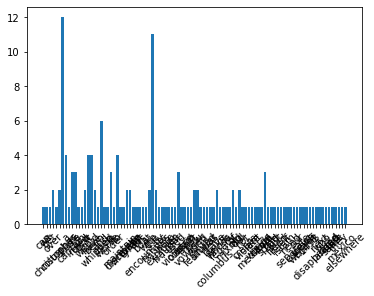

{'overturning': 1, 'white': 2, 'supremacy': 2, 'is': 1, 'going': 1, 'to': 4, 'take': 1, 'a': 1, 'long': 2, 'time': 1, '': 1, 'hopefully': 1, 'the': 4, 'responses': 1, 'murder': 1, 'of': 1, 'george': 1, 'floyd': 1, 'will': 1, 'speed': 1, 'up': 1, 'this': 1, 'process': 1, 'in': 1, 'run\n\nin': 1, 'short': 1, 'term': 1, 'however': 1, 'we': 2, "don't": 1, 'need': 2, 'overturn': 1, 'just': 1, 'out': 1, 'vote': 1, 'it': 1}


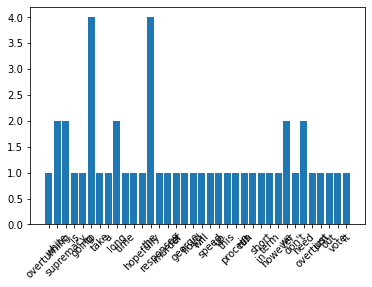

{'the': 2, 'choice': 1, 'we': 1, 'have': 1, 'on': 1, '3': 1, 'november': 1, 'could': 1, 'not': 1, 'be': 1, 'more': 1, 'stark:\n\nchoose': 1, 'america': 2, 'or': 1, 'choose': 2, 'trump\n\ni': 1, 'and': 1, 'better': 1, 'angels': 1, 'of': 1, 'our': 1, 'nature': 1}


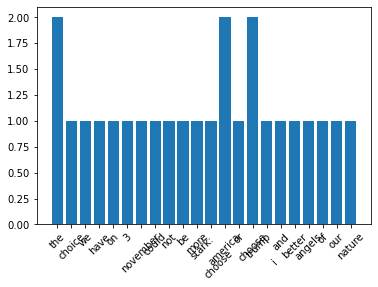

{'yes': 1, 'we': 2, 'had': 2, 'statues': 1, 'of': 3, 'cristopher': 1, 'columbus': 1, 'pulled': 1, 'down': 1, 'here': 2, 'in': 3, 'boston': 1, '': 3, 'a': 2, 'lot': 2, 'protests': 1, 'is': 1, 'this': 1, 'going': 1, 'to': 2, 'change': 1, 'the': 1, 'inequality': 1, 'education': 1, 'housing': 1, 'issues': 2, 'jobs': 1, 'and': 1, 'wages': 1, 'health': 1, 'etc': 1, 'there': 1, "aren't": 1, 'whole': 1, 'republicans': 1, 'sight': 1, 'blame': 1}


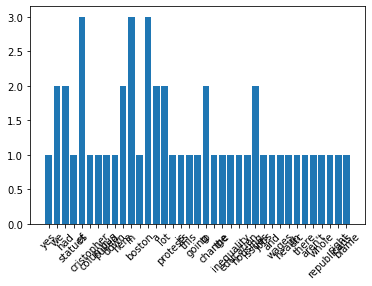

{'as': 2, 'the': 11, 'statues': 1, 'come': 2, 'down': 1, 'and': 4, 'history': 1, 'is': 1, 'rewritten': 1, 'more': 1, 'accurately': 1, 'present': 1, 'will': 4, 'fade': 1, 'into': 1, 'past': 1, 'future': 1, 'generations': 1, 'wonder': 1, 'what': 1, 'we': 1, 'may': 1, 'have': 2, 'been': 3, 'thinking\n': 1, "\ni've": 1, 'to': 3, 'believe': 1, 'that': 2, 'those': 2, 'who': 3, 'denied': 1, 'rights': 1, 'proclaimed': 1, 'in': 2, 'our': 3, 'constitution': 4, 'become': 1, 'ones': 2, 'best': 1, 'able': 1, 'restore': 1, 'democracy': 1, 'by': 2, 'taking': 1, 'most': 2, 'literally': 1, 'without': 1, 'all': 1, 'legalistic': 1, 'baggage': 1, "that's": 1, 'added': 1, 'decades': 1, 'even': 1, 'centuries': 1, 'of': 2, 'special': 1, 'privilege': 1, "it's": 1, 'if': 1, 'country': 1, 'needs': 1, 'be': 2, 'born': 2, 'again': 2, 'under': 1, 'are': 1, 'now': 1, 'deprived': 1, 'its': 1, 'benefits': 1, 'make': 1, 'live': 1, 'again\n\napologies': 1, 'for': 1, 'any': 1, 'religious': 1, 'inferences': 1, 'i': 1, 'u

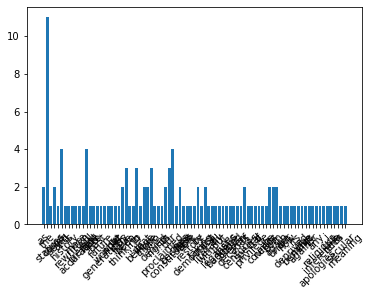

{'in': 4, 'the': 10, 'wake': 1, 'of': 12, 'massive': 1, 'protests': 1, 'support': 3, 'black': 2, 'lives': 3, 'matter': 1, 'a': 2, 'major': 1, 'part': 2, 'story': 2, 'is': 2, 'how': 1, 'many': 1, 'white': 2, 'americans': 3, 'are': 9, 'now': 1, 'marching': 2, 'as': 2, 'well': 1, 'but': 3, 'less': 2, 'examined': 1, 'that': 8, 'these': 3, 'protesters': 1, 'also': 4, 'their': 4, 'own': 2, 'while': 3, 'not': 2, 'subjected': 1, 'much': 1, 'to': 7, 'police': 2, 'violence': 1, 'or': 1, 'even': 1, 'deadly': 1, 'corona': 1, 'virus': 1, 'has': 1, 'disproportionately': 1, 'affected': 1, 'minorities': 1, 'they': 6, 'immune': 1, 'facing': 1, 'grim': 1, 'economic': 3, 'future': 1, 'offers': 1, 'them': 1, 'far': 1, 'opportunity': 1, 'than': 1, 'it': 2, 'once': 2, 'did': 1, 'parents': 1, 'mostly': 2, 'young': 2, 'seem': 1, 'understand': 1, 'futures': 1, 'intricately': 1, 'linked': 1, 'others': 1, 'see': 1, 'need': 1, 'address': 1, 'racism': 2, 'and': 2, 'supremacy': 1, 'immoral': 1, 'levels': 1, 'inequa

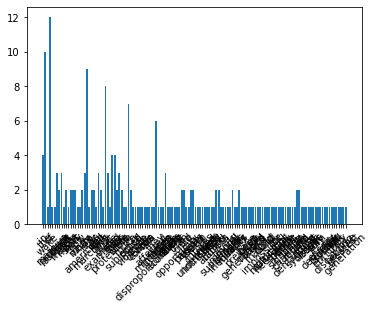

In [115]:
# split text into list
text_data = []

# try and plot out a chart of the dictionary we just created!
import matplotlib.pyplot as plt

for comment in comments:
    commentBody = comment["commentBody"]  
    lowercaseComment = commentBody.lower()
    removePunc = lowercaseComment.replace('"', '').replace('.', '').replace('“', '').replace(',', '').replace('’', '').replace('-', '').replace('?', '').replace('(', '').replace(')', '')
    single_word = removePunc.split(' ');
    text_data.append(single_word)

# print(text_data)

# create a dictionary of word frequencies!
# word_frequencies = {}

# go through each word in text_data
    # if the word isn't in the dictionary, add it as a key AND give it a value of 1
    # if the word IS in the dictionary, add 1 to the value
    

for each_sentence in text_data: 
    word_frequency = {}
    
    for word in each_sentence: 
        count = each_sentence.count(word) 
        word_frequency[word] = count
         

#         made an attempt to use conditionals below, but felt better about using count()

#         if word is not word_frequency: 
#             word_frequency[word] = 1
#         elif word is word_frequency:
#             print("yes")
            
    print(word_frequency)
    plt.bar(range(len(word_frequency)), list(word_frequency.values()), align='center')
    plt.xticks(range(len(word_frequency)), list(word_frequency.keys()), rotation = 45)
    plt.show() 
    
#     word_frequencies.update(word_frequency)

# print(word_frequencies)
